In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import torch

from models.transformer import Transformer
from models.bias_maps import *

## Distributions

In [4]:
labels, logdirs = zip(*[
    ('$r^{-1}$', './logs/FixedPowerLaw1/E128_H8_D8/'), 
    ('$r^{-2}$', './logs/FixedPowerLaw2/E128_H8_D8/'), 
    ('$r^{-3}$', './logs/FixedPowerLaw3/E128_H8_D8/'), 
    ('$r^{-4}$', './logs/FixedPowerLaw4/E128_H8_D8/'), 
    #('$r^{-5}$', './logs/FixedPowerLaw5/E128_H8_D8/'), 
    ('Gaussian', './logs/GaussianBasis/E128_H8_D8/'), 
    ('exp', './logs/ExpNegativePowerLaw/E128_H8_D8/'), 
    ('softplus', './logs/SoftplusNegativePowerLaw/E128_H8_D8/'), 
    ('power', './logs/PowerLaw/E128_H8_D8/')
])

./logs/GaussianBasis/E128_H8_D8/06_12_12_54_06_1.csv


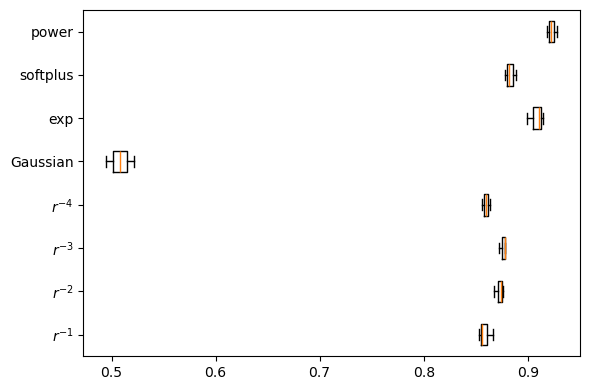

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

log_scores = []

for logdir in logdirs:

    scores = []
    for logfile in os.listdir(logdir):
        if not logfile.endswith('.csv'): continue
        arr = pd.read_csv(logdir + logfile)['validation_r2'][:64]
        if len(arr) < 64: print(logdir + logfile)
        scores.append(arr[np.argpartition(arr, -4)[-4:]].mean())

    log_scores.append(scores)

ax.boxplot(
    log_scores, tick_labels=labels, 
    vert=False
)
plt.tight_layout()

## Weights

In [18]:
weightsdir = './weights/PowerLaw/E128_H8_D8/'

(array([ 1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,
         2.,  1.,  0.,  0.,  0.,  3.,  1.,  1.,  3.,  4.,  5.,  9.,  9.,
        97.,  5.,  4.,  5.,  5.,  3.,  5.,  4.,  3.,  1.,  1.,  1.,  0.,
         0.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-1.61160958, -1.57106471, -1.53051972, -1.48997486, -1.44942999,
        -1.40888512, -1.36834013, -1.32779527, -1.2872504 , -1.24670541,
        -1.20616055, -1.16561568, -1.12507069, -1.08452582, -1.04398096,
        -1.00343609, -0.9628911 , -0.92234623, -0.88180131, -0.84125644,
        -0.80071151, -0.76016665, -0.71962172, -0.67907679, -0.63853192,
        -0.597987  , -0.55744213, -0.5168972 , -0.4763523 , -0.43580741,
        -0.39526248, -0.35471758, -0.31417269, -0.27362779, -0.23308288,
        -0.19253798, -0.15199307, -0.11144817, -0.07090327, -0.03035836,
         0.01018654,  0.05073144,  0.09127635,  0.1318

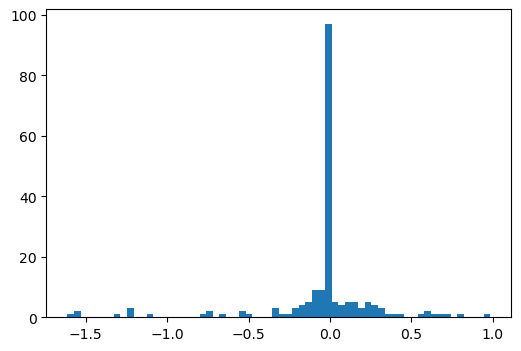

In [23]:
exponents = []
for weightsfile in os.listdir(weightsdir):
    if not weightsfile.endswith('.pt'): continue

    model = Transformer(
        in_features=6, 
        out_features=15, 
        E=128, H=8, D=8, 
        dropout=0.1, 
        BiasMap=PowerLaw
    )
    model.load_state_dict(torch.load(weightsdir + weightsfile, map_location=torch.device('cpu')))

    for i, transformer_block in enumerate(model.transformer_blocks):
        exponents += list(transformer_block.bias_map.p.squeeze().detach())

    #exponents += list(model.transformer_blocks[0].bias_map.log_p.exp().squeeze().detach())


fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(exponents, bins=64)

## Train curves

In [3]:
labels, logdirs = zip(*[
    ('$r^{-1}$', './logs/FixedPowerLaw1/emb_E128_H8_8/'), 
    ('$r^{-2}$', './logs/FixedPowerLaw2/emb_E128_H8_8/'), 
    ('$r^{-3}$', './logs/FixedPowerLaw3/emb_E128_H8_8/'), 
    ('$r^{-4}$', './logs/FixedPowerLaw4/emb_E128_H8_8/'), 
    ('$r^{-5}$', './logs/FixedPowerLaw5/emb_E128_H8_8/'), 
    ('Gaussian', './logs/GaussianBasis/emb_E128_H8_8/'), 
    ('$r^{-p}$', './logs/LearnedNegativePowerLaw/emb_E128_H8_8/')
])

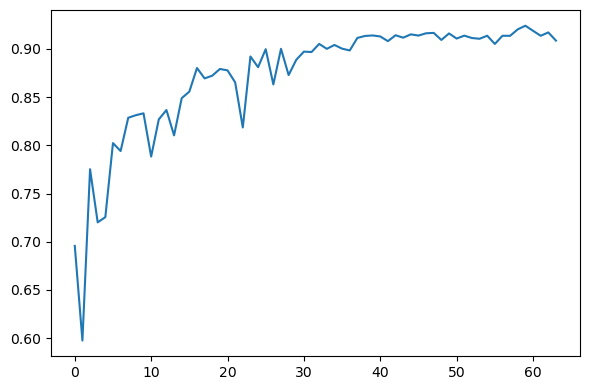

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

logdir = './logs/PowerLaw/E128_H8_D8/'

n_curves = 0
sum_curve = np.zeros(64)
for logfile in os.listdir(logdir):
    if not logfile.endswith('.csv'): continue
    sum_curve += pd.read_csv(logdir + logfile)['validation_r2'][:64]
    n_curves += 1

ax.plot(sum_curve / n_curves)

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(len(logdirs)figsize=(6, 4))

log_scores = []

for logdir in logdirs:

    n_curves
    avg_curve = np.zeros(64)
    for logfile in os.listdir(logdir):
        if not logfile.endswith('.csv'): continue
        curve += pd.read_csv(logdir + logfile)['validation_r2'][:64]

    

ax.boxplot(
    log_scores, tick_labels=labels, 
    vert=False
)
plt.tight_layout()